In [1]:
import pandas as pd
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [2]:
df= pd.read_excel('after_EDA_final_dd.xlsx')

In [3]:
df.head()

Unnamed: 0   AVG_UTILIZE  CR_CARD_LIMIT CR_CARD_CUSCOUN CR_CARD_CSTATUS  \
0           0   1756.446667          20000       SRI LANKA            NORM   
1           2   7828.763333          50000       SRI LANKA            NORM   
2           3   1276.666667          24000       SRI LANKA            NORM   
3           4  20623.063333          42000       SRI LANKA            NORM   
4           6  16696.200000          90000       SRI LANKA            NORM   

   CR_CARD_VIP   STR_CR_CARD_NUM  CR_CARD_ARR CR_CARD_STAFF  \
0            0  4157380000039007            0             N   
1            0  4157380000060029            0             N   
2            0  4157380000066018            0             N   
3            0  4157380000072008            0             N   
4            0  4157380000089002            0             N   

  CR_EXPIRYDATESTATUS  ... DEBIT_CARD_USAGE     NII   AGE     CC_AGE  \
0                   A  ...              0.0  -67.06  80.0  26.083333   
1                   A  ...              0.0   13.70  63.0  26.000000   
2                   A  ...              0.0  812.40  61.0  26.000000   
3                   A  ...              0.0  128.78  56.0  25.916667   
4                   A  ...              0.0 -100.63  60.0  25.916667   

  CUSTOMER_DEBIT_ACC CUSTOMER_DEBIT_ACC_BALANCE  CUSTOMER_CREDIT_ACC  \
0                  3                       0.00                    0   
1                  0                       0.00                    0   
2                  1                   47205.46                    0   
3                  1                  170194.41                    0   
4                  1                   37060.15                    0   

   CUSTOMER_CREDIT_ACC_BALANCE  AVG_LIMIT_UTILIZATION  PAYMENT_AVG  
0                          0.0               8.782233     8.008889  
1                          0.0              15.657527  3713.374413  
2                          0.0               5.319444     9.591558  
3                          0.0              49.102532    95.901806  
4                          0.0              18.551333    66.104647  

[5 rows x 39 columns]

In [4]:
df.shape

(24875, 39)

In [5]:
pd.set_option('display.max_rows', None)

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = df[df['CR_CARD_OVERDUE_STATUS'] == 'G']

In [8]:
df.shape

(22896, 39)

In [9]:
df_selected = df[['STR_CR_CARD_NUM', 'AVG_LIMIT_UTILIZATION','AGE', 'PAYMENT_AVG', 'CC_AGE','CUSTOMER_PROFITABILITY','CUSTOMER_DEBIT_ACC_BALANCE'
    
                ]]

In [10]:
df_selected.head()

STR_CR_CARD_NUM  AVG_LIMIT_UTILIZATION   AGE  PAYMENT_AVG     CC_AGE  \
0  4157380000039007               8.782233  80.0     8.008889  26.083333   
1  4157380000060029              15.657527  63.0  3713.374413  26.000000   
2  4157380000066018               5.319444  61.0     9.591558  26.000000   
3  4157380000072008              49.102532  56.0    95.901806  25.916667   
4  4157380000089002              18.551333  60.0    66.104647  25.916667   

   CUSTOMER_PROFITABILITY  CUSTOMER_DEBIT_ACC_BALANCE  
0                  -67.06                        0.00  
1                   13.70                        0.00  
2                  812.40                    47205.46  
3                  148.78                   170194.41  
4                  249.37                    37060.15

In [11]:
df_selected.shape

(22896, 7)

In [12]:
# Assuming 'df_selected' is your DataFrame
df_new = df_selected.drop(columns=['STR_CR_CARD_NUM'],axis=1)
df_new.head()

AVG_LIMIT_UTILIZATION   AGE  PAYMENT_AVG     CC_AGE  \
0               8.782233  80.0     8.008889  26.083333   
1              15.657527  63.0  3713.374413  26.000000   
2               5.319444  61.0     9.591558  26.000000   
3              49.102532  56.0    95.901806  25.916667   
4              18.551333  60.0    66.104647  25.916667   

   CUSTOMER_PROFITABILITY  CUSTOMER_DEBIT_ACC_BALANCE  
0                  -67.06                        0.00  
1                   13.70                        0.00  
2                  812.40                    47205.46  
3                  148.78                   170194.41  
4                  249.37                    37060.15

In [13]:
df_new.shape

(22896, 6)

In [14]:
df_new.dtypes

AVG_LIMIT_UTILIZATION         float64
AGE                           float64
PAYMENT_AVG                   float64
CC_AGE                        float64
CUSTOMER_PROFITABILITY        float64
CUSTOMER_DEBIT_ACC_BALANCE    float64
dtype: object

In [15]:
df_new.isna().sum()

AVG_LIMIT_UTILIZATION         0
AGE                           0
PAYMENT_AVG                   0
CC_AGE                        0
CUSTOMER_PROFITABILITY        0
CUSTOMER_DEBIT_ACC_BALANCE    0
dtype: int64

In [16]:
from sklearn.preprocessing import MinMaxScaler
X = pd.DataFrame(MinMaxScaler().fit_transform(df_new))

In [17]:
X = np.asarray(X)

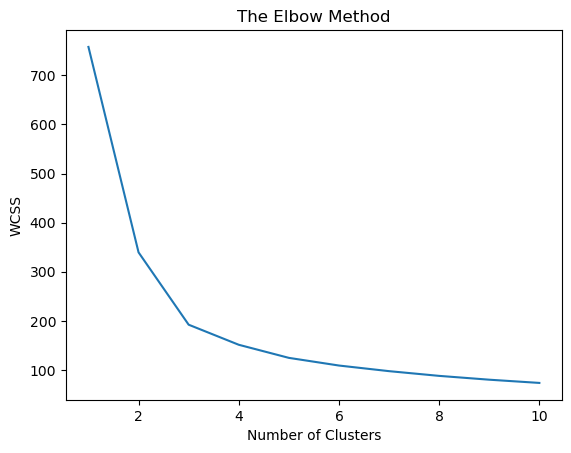

In [18]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',max_iter=500, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.572635252327546
For n_clusters = 3 The average silhouette_score is : 0.5138850635558784
For n_clusters = 4 The average silhouette_score is : 0.40232505567696886
For n_clusters = 5 The average silhouette_score is : 0.3696448386861988
For n_clusters = 6 The average silhouette_score is : 0.3675109769438732
For n_clusters = 7 The average silhouette_score is : 0.3722299079744339
For n_clusters = 8 The average silhouette_score is : 0.3808184757455853
For n_clusters = 9 The average silhouette_score is : 0.3769437315815402
For n_clusters = 10 The average silhouette_score is : 0.37041758684972653


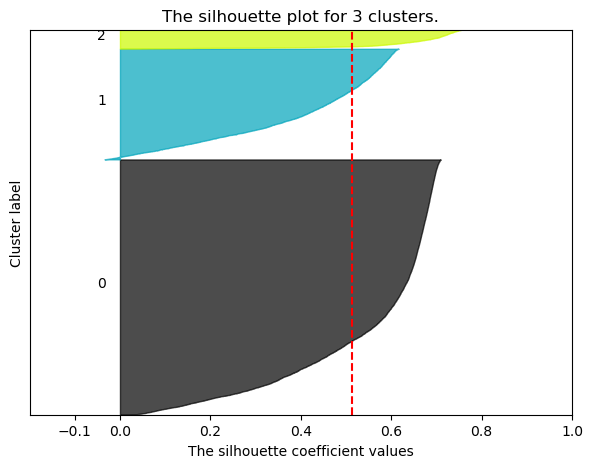

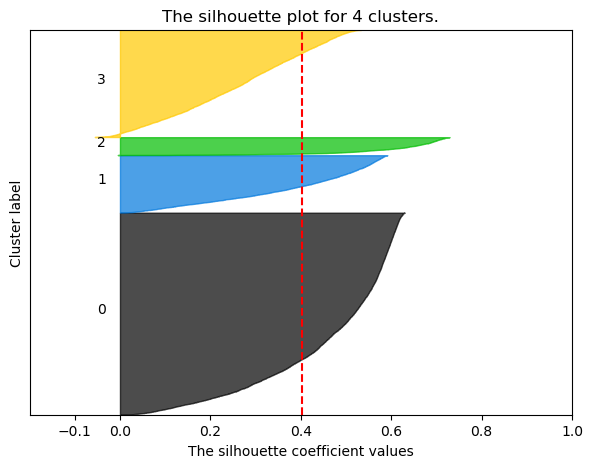

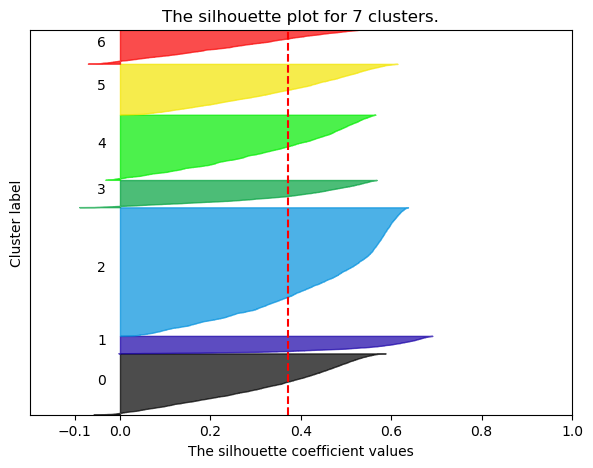

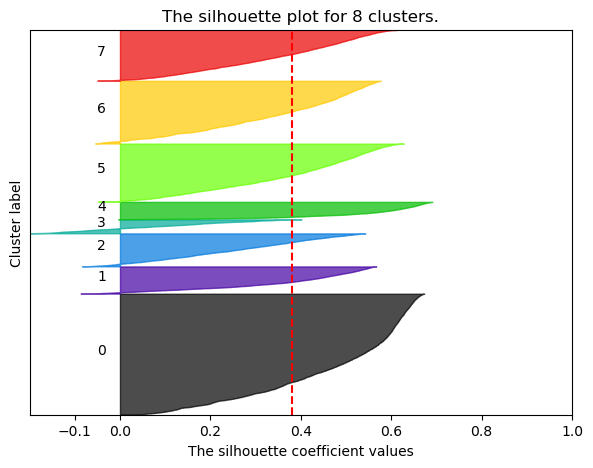

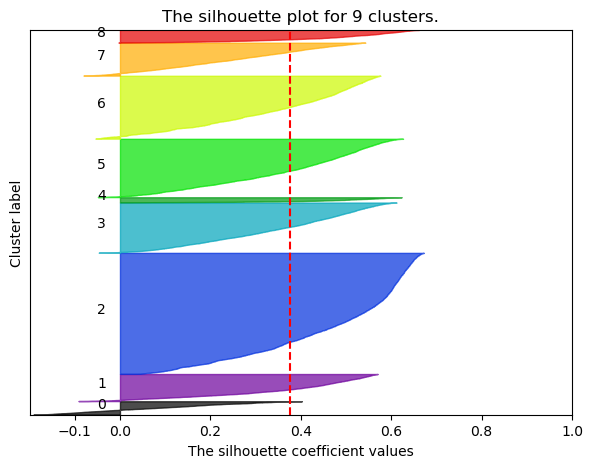

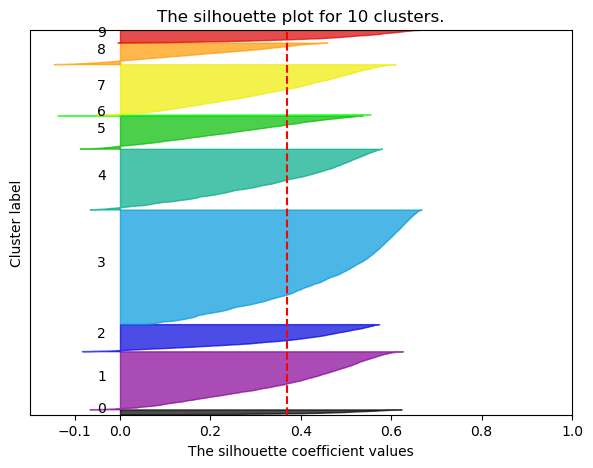

In [20]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 1 column
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(7, 5)

    # The silhouette plot
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=500, random_state=42 )
    cluster_labels = clusterer.fit_predict(X)
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =", n_clusters,
        "The average silhouette_score is :", silhouette_avg
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  

    ax1.set_title(f"The silhouette plot for {n_clusters} clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

In [43]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming X is your feature matrix (DataFrame or ndarray)

n_clusters = 3

# Initialize the clusterer with n_clusters value and a random generator
# seed of 42 for reproducibility.
clusterer = KMeans(n_clusters=n_clusters,init='k-means++',max_iter=400, random_state=45862)
cluster_labels = clusterer.fit_predict(X)

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(X, cluster_labels)
print("For n_clusters =", n_clusters,
      "The average silhouette_score is :", silhouette_avg)

For n_clusters = 3 The average silhouette_score is : 0.5137311932891977


In [44]:
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score

# Assuming cluster_labels contains the assigned cluster labels
# and X is your feature matrix (DataFrame or ndarray)

# Davies-Bouldin Index
db_index = davies_bouldin_score(X, cluster_labels)

# Silhouette Score
silhouette_avg = silhouette_score(X, cluster_labels)

# Calinski-Harabasz Index
calinski_harabasz_index = calinski_harabasz_score(X, cluster_labels)

print("Davies-Bouldin Index:", db_index)
print("Silhouette Score:", silhouette_avg)
print("Calinski-Harabasz Index:", calinski_harabasz_index)


Davies-Bouldin Index: 0.6649102875382229
Silhouette Score: 0.5137311932891977
Calinski-Harabasz Index: 33643.82651379646


In [45]:
df_selected['cluster_label'] = cluster_labels

# Create a dictionary to store dataframes for each cluster
cluster_dataframes = {}

# Iterate over each cluster label
for cluster_num in range(n_clusters):
    # Filter the original DataFrame to create a dataframe for the current cluster
    cluster_dataframes[f'df_cluster_{cluster_num}'] = df_selected[df_selected['cluster_label'] == cluster_num].copy()

# Now cluster_dataframes is a dictionary containing separate dataframes for each cluster
# Each dataframe is stored with a variable name like df_cluster_0, df_cluster_1, etc.

# Print the first few rows of each cluster dataframe
for cluster_name, cluster_df in cluster_dataframes.items():
    print(f"{cluster_name} dataframe:")
    print(cluster_df.head())
    print()


df_cluster_0 dataframe:
       STR_CR_CARD_NUM  AVG_LIMIT_UTILIZATION   AGE  PAYMENT_AVG  CC_AGE  \
234   4157385011587001                   5.33 44.00         8.33    5.25   
3303  4157385100001278                  21.15 57.00       256.32    4.42   
3304  4157385100001310                   8.77 44.00      1228.70    4.92   
3306  4157385100001401                  11.39 35.00         2.03    4.83   
3307  4157385100001468                  16.67 63.00        85.33    4.75   

      CUSTOMER_PROFITABILITY  CUSTOMER_DEBIT_ACC_BALANCE  cluster_label  
234                 11167.52                  1521493.47              0  
3303                 3232.51                    80146.60              0  
3304                73204.07                 67848952.83              0  
3306                39130.84                   758654.86              0  
3307                 1028.17                    39945.75              0  

df_cluster_1 dataframe:
     STR_CR_CARD_NUM  AVG_LIMIT_UTILIZATION   AGE 

In [46]:
cluster_counts = pd.Series(cluster_labels).value_counts()
cluster_counts

0    15184
1     6597
2     1115
Name: count, dtype: int64

In [47]:
# Access the dataframe for cluster 1 using the dictionary
df_cluster_0 = cluster_dataframes['df_cluster_0']

# Now you can use df_cluster_1.head() to view the first few rows of the dataframe
print(df_cluster_0.head())


       STR_CR_CARD_NUM  AVG_LIMIT_UTILIZATION   AGE  PAYMENT_AVG  CC_AGE  \
234   4157385011587001                   5.33 44.00         8.33    5.25   
3303  4157385100001278                  21.15 57.00       256.32    4.42   
3304  4157385100001310                   8.77 44.00      1228.70    4.92   
3306  4157385100001401                  11.39 35.00         2.03    4.83   
3307  4157385100001468                  16.67 63.00        85.33    4.75   

      CUSTOMER_PROFITABILITY  CUSTOMER_DEBIT_ACC_BALANCE  cluster_label  
234                 11167.52                  1521493.47              0  
3303                 3232.51                    80146.60              0  
3304                73204.07                 67848952.83              0  
3306                39130.84                   758654.86              0  
3307                 1028.17                    39945.75              0  


In [48]:
# Access the dataframe for cluster 1 using the dictionary
df_cluster_1 = cluster_dataframes['df_cluster_1']

# Now you can use df_cluster_1.head() to view the first few rows of the dataframe
print(df_cluster_1.head())


     STR_CR_CARD_NUM  AVG_LIMIT_UTILIZATION   AGE  PAYMENT_AVG  CC_AGE  \
30  4157384100160002                  10.35 56.00        24.62   11.00   
34  4157384100176016                  20.34 43.00     -5955.29   10.58   
35  4157384100184002                  20.34 59.00       433.65   10.58   
36  4157384100189001                  14.12 53.00       161.85   10.58   
37  4157384100192005                   7.36 71.00        23.66   10.58   

    CUSTOMER_PROFITABILITY  CUSTOMER_DEBIT_ACC_BALANCE  cluster_label  
30                 1839.97                    16104.00              1  
34                34398.63                 14339386.76              1  
35                  120.47                     7368.99              1  
36                 8835.77                  2549595.99              1  
37                 3909.88                   326386.86              1  


In [49]:
# Access the dataframe for cluster 1 using the dictionary
df_cluster_2 = cluster_dataframes['df_cluster_2']

# Now you can use df_cluster_1.head() to view the first few rows of the dataframe
print(df_cluster_2.head())

    STR_CR_CARD_NUM  AVG_LIMIT_UTILIZATION   AGE  PAYMENT_AVG  CC_AGE  \
0  4157380000039007                   8.78 80.00         8.01   26.08   
1  4157380000060029                  15.66 63.00      3713.37   26.00   
2  4157380000066018                   5.32 61.00         9.59   26.00   
3  4157380000072008                  49.10 56.00        95.90   25.92   
4  4157380000089002                  18.55 60.00        66.10   25.92   

   CUSTOMER_PROFITABILITY  CUSTOMER_DEBIT_ACC_BALANCE  cluster_label  
0                  -67.06                        0.00              2  
1                   13.70                        0.00              2  
2                  812.40                    47205.46              2  
3                  148.78                   170194.41              2  
4                  249.37                    37060.15              2  


In [50]:
df_cluster_0.describe()

STR_CR_CARD_NUM  AVG_LIMIT_UTILIZATION      AGE  PAYMENT_AVG  \
count            15184.00               15184.00 15184.00     15184.00   
mean  4381266393111185.00                  19.42    39.52      1751.28   
std    342848928568114.62                  18.83    11.48    155993.95   
min   4157385011587001.00                   5.00    20.00    -98227.95   
25%   4157390076439753.00                   8.06    30.00        27.70   
50%   4284170027326003.00                  13.38    37.00        72.95   
75%   4284174074763752.00                  24.05    47.00       132.42   
max   5583398010340000.00                 525.70    98.00  19088956.25   

        CC_AGE  CUSTOMER_PROFITABILITY  CUSTOMER_DEBIT_ACC_BALANCE  \
count 15184.00                15184.00                    15184.00   
mean      2.54                 6957.14                  2075713.83   
std       1.20                47738.13                 18304934.83   
min       1.00             -3550917.96                        0.00   
25%       1.58                    0.00                        0.00   
50%       2.25                 1130.59                    25797.83   
75%       3.33                 4779.88                   321383.96   
max       5.75              2088898.39               1522943515.72   

       cluster_label  
count       15184.00  
mean            0.00  
std             0.00  
min             0.00  
25%             0.00  
50%             0.00  
75%             0.00  
max             0.00

In [51]:
df_cluster_1.describe()

STR_CR_CARD_NUM  AVG_LIMIT_UTILIZATION     AGE  PAYMENT_AVG  CC_AGE  \
count             6597.00                6597.00 6597.00      6597.00 6597.00   
mean  4347978539499139.50                  18.06   49.44       184.19    7.99   
std    386870987436102.38                  22.44   11.91      6339.79    2.01   
min   4157384100160002.00                   5.00   23.00    -84126.07    1.83   
25%   4157385096611007.00                   7.53   40.00        24.06    6.50   
50%   4157390025166016.00                  11.96   48.00        64.39    7.58   
75%   4284170012383006.00                  20.95   57.00       111.76    9.25   
max   5583390000472000.00                 520.24  231.00    414072.63   13.50   

       CUSTOMER_PROFITABILITY  CUSTOMER_DEBIT_ACC_BALANCE  cluster_label  
count                 6597.00                     6597.00        6597.00  
mean                  9842.79                  3106311.13           1.00  
std                  61511.02                 19285302.14           0.00  
min                -728304.31                        0.00           1.00  
25%                      0.00                        0.00           1.00  
50%                   1204.12                    42590.23           1.00  
75%                   5782.23                   647593.18           1.00  
max                2999833.92                860363588.89           1.00

In [52]:
df_cluster_2.describe()

STR_CR_CARD_NUM  AVG_LIMIT_UTILIZATION     AGE  PAYMENT_AVG  CC_AGE  \
count             1115.00                1115.00 1115.00      1115.00 1115.00   
mean  4415410411410716.00                  18.67   58.04        91.03   18.93   
std    525183500550442.75                  18.40   10.55      1162.05    2.82   
min   4157380000039007.00                   5.01   18.00    -20673.10   13.33   
25%   4157385020216002.00                   8.21   50.00        20.87   16.92   
50%   4157385039478001.00                  12.82   57.00        63.35   18.58   
75%   4157389000090504.50                  22.99   65.00       114.33   20.75   
max   5488070105507001.00                 250.11   94.00     19386.57   26.83   

       CUSTOMER_PROFITABILITY  CUSTOMER_DEBIT_ACC_BALANCE  cluster_label  
count                 1115.00                     1115.00        1115.00  
mean                  5099.11                  1265249.51           2.00  
std                  16961.17                  4584095.36           0.00  
min                  -4375.11                        0.00           2.00  
25%                      0.00                        0.00           2.00  
50%                    595.11                    15711.24           2.00  
75%                   3343.52                   406546.85           2.00  
max                 285380.48                 59960626.64           2.00

In [53]:
import pandas as pd

# Set the display option to show numbers in normal notation
pd.options.display.float_format = '{:.2f}'.format

# Selecting only the specified variables and calculating the mean for each cluster
mean_cluster_0 = df_cluster_0[['AVG_LIMIT_UTILIZATION', 'AGE', 'PAYMENT_AVG', 'CC_AGE', 'CUSTOMER_PROFITABILITY', 'CUSTOMER_DEBIT_ACC_BALANCE']].mean()
mean_cluster_1 = df_cluster_1[['AVG_LIMIT_UTILIZATION', 'AGE', 'PAYMENT_AVG', 'CC_AGE', 'CUSTOMER_PROFITABILITY', 'CUSTOMER_DEBIT_ACC_BALANCE']].mean()
mean_cluster_2 = df_cluster_2[['AVG_LIMIT_UTILIZATION', 'AGE', 'PAYMENT_AVG', 'CC_AGE', 'CUSTOMER_PROFITABILITY', 'CUSTOMER_DEBIT_ACC_BALANCE']].mean()

# Combining mean values into a single DataFrame
mean_table = pd.concat([mean_cluster_0, mean_cluster_1, mean_cluster_2], axis=1)
mean_table.columns = ['Cluster 0', 'Cluster 1', 'Cluster 2']

print(mean_table)


                            Cluster 0  Cluster 1  Cluster 2
AVG_LIMIT_UTILIZATION           19.42      18.06      18.67
AGE                             39.52      49.44      58.04
PAYMENT_AVG                   1751.28     184.19      91.03
CC_AGE                           2.54       7.99      18.93
CUSTOMER_PROFITABILITY        6957.14    9842.79    5099.11
CUSTOMER_DEBIT_ACC_BALANCE 2075713.83 3106311.13 1265249.51


In [54]:
import pandas as pd

# Set the display option to show numbers in normal notation
pd.options.display.float_format = '{:.2f}'.format

# Selecting only the specified variables and calculating the median for each cluster
median_cluster_0 = df_cluster_0[['AVG_LIMIT_UTILIZATION', 'AGE', 'PAYMENT_AVG', 'CC_AGE', 'CUSTOMER_PROFITABILITY', 'CUSTOMER_DEBIT_ACC_BALANCE']].median()
median_cluster_1 = df_cluster_1[['AVG_LIMIT_UTILIZATION', 'AGE', 'PAYMENT_AVG', 'CC_AGE', 'CUSTOMER_PROFITABILITY', 'CUSTOMER_DEBIT_ACC_BALANCE']].median()
median_cluster_2 = df_cluster_2[['AVG_LIMIT_UTILIZATION', 'AGE', 'PAYMENT_AVG', 'CC_AGE', 'CUSTOMER_PROFITABILITY', 'CUSTOMER_DEBIT_ACC_BALANCE']].median()

# Combining median values into a single DataFrame
median_table = pd.concat([median_cluster_0, median_cluster_1, median_cluster_2], axis=1)
median_table.columns = ['Cluster 0', 'Cluster 1', 'Cluster 2']

print(median_table)


                            Cluster 0  Cluster 1  Cluster 2
AVG_LIMIT_UTILIZATION           13.38      11.96      12.82
AGE                             37.00      48.00      57.00
PAYMENT_AVG                     72.95      64.39      63.35
CC_AGE                           2.25       7.58      18.58
CUSTOMER_PROFITABILITY        1130.59    1204.12     595.11
CUSTOMER_DEBIT_ACC_BALANCE   25797.83   42590.23   15711.24
